**Formatare Date**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

columns_to_plot = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                   'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                   'Weekend', 'Revenue']

numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                   'SpecialDay']

categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                   'Weekend']




1. Analiza echilibrului de clase

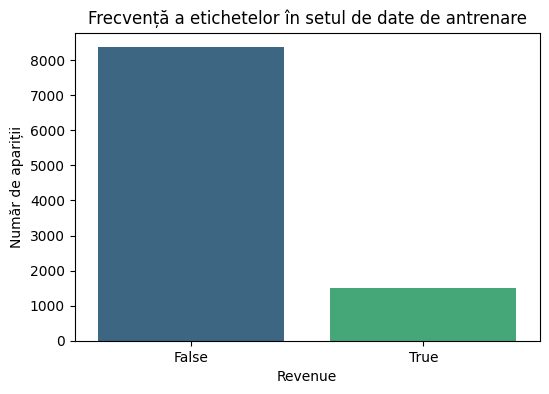

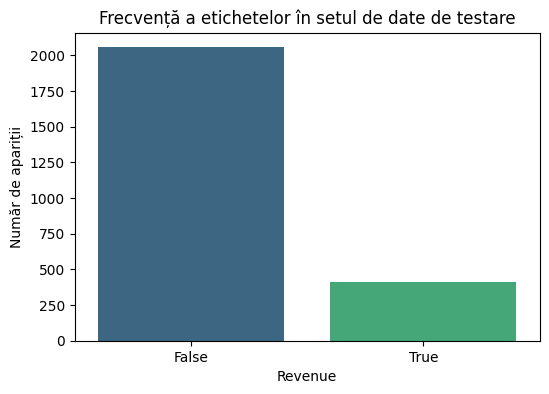

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.title('Frecvență a etichetelor în setul de date de antrenare')
plt.xlabel('Revenue')
plt.ylabel('Număr de apariții')
plt.show()

# Crearea countplot-ului pentru setul de date de testare
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='viridis')
plt.title('Frecvență a etichetelor în setul de date de testare')
plt.xlabel('Revenue')
plt.ylabel('Număr de apariții')
plt.show()

# 2. Vizualizarea atributelor
##  A.
### i) Atribute numerice

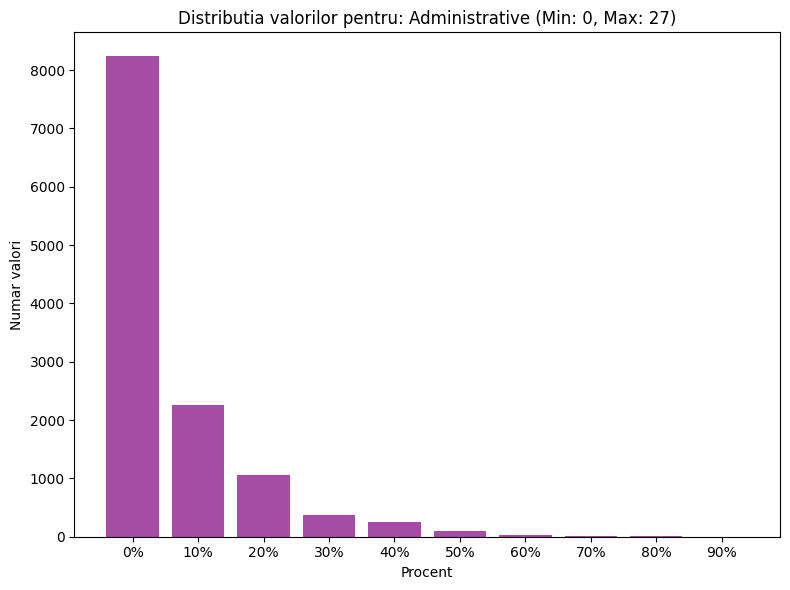

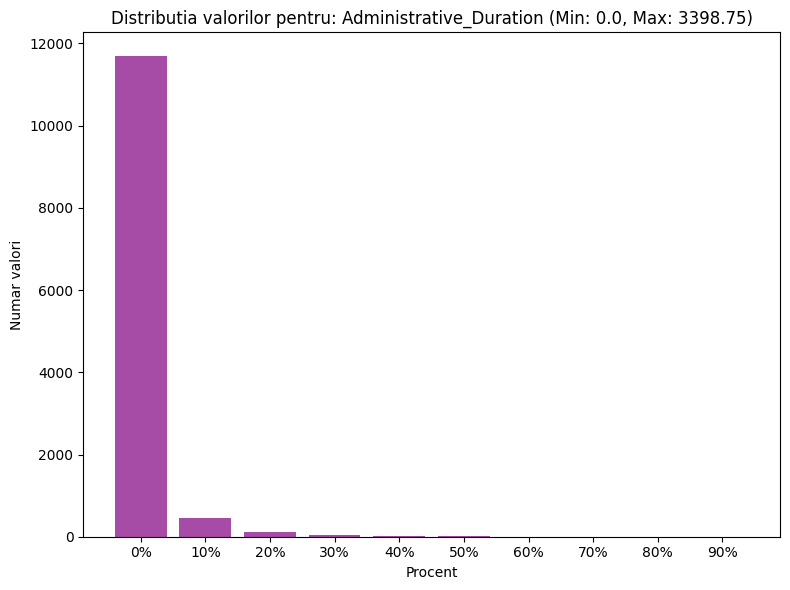

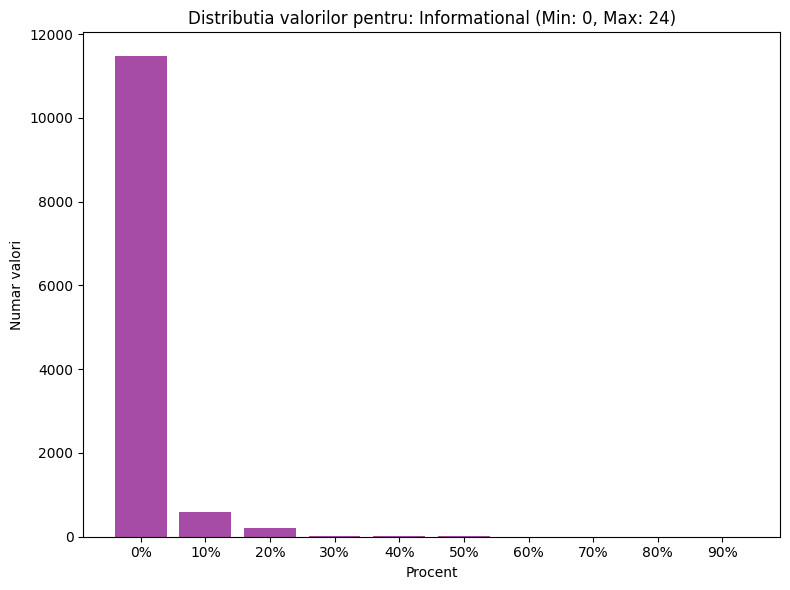

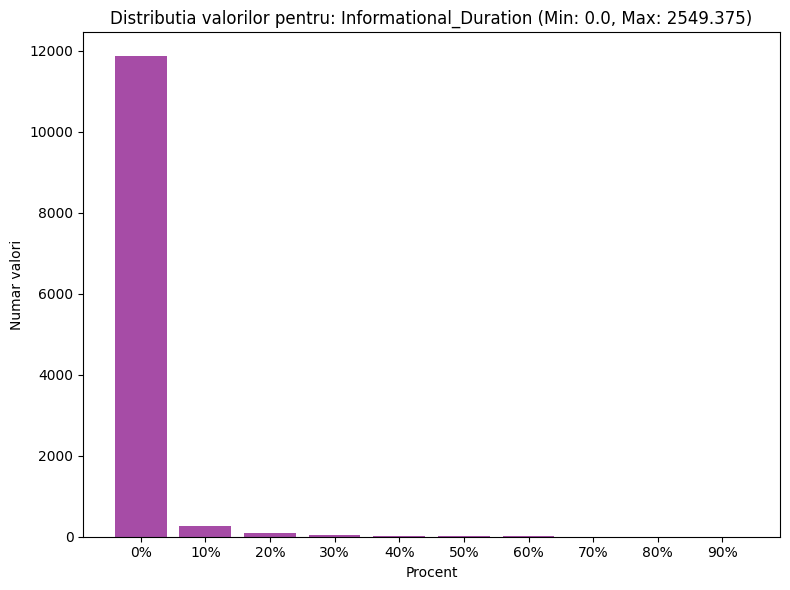

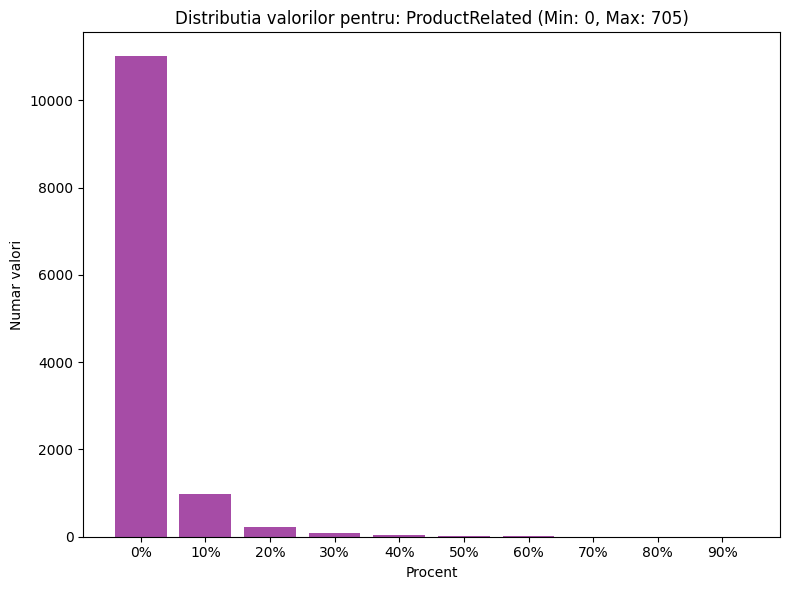

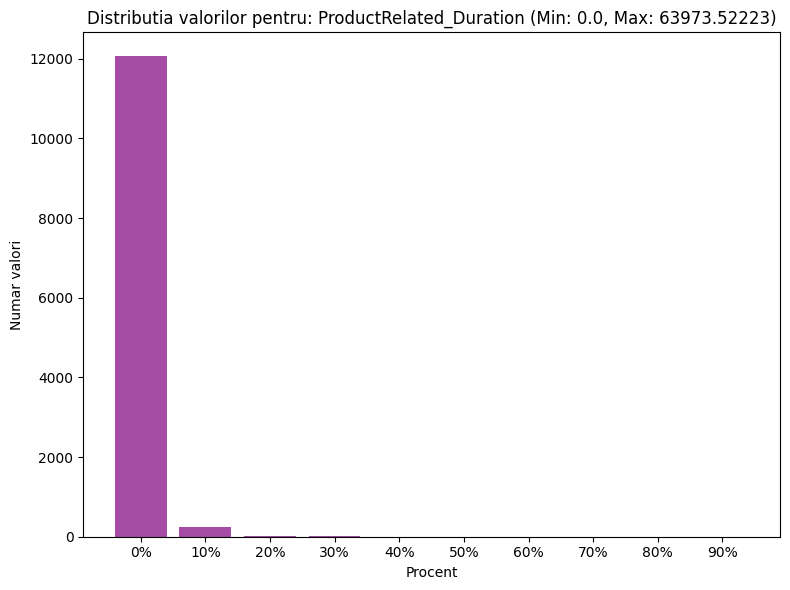

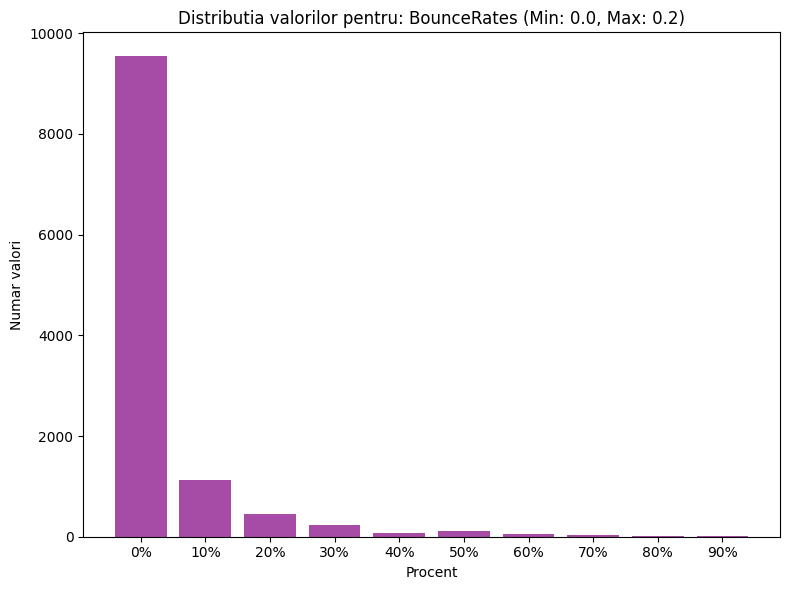

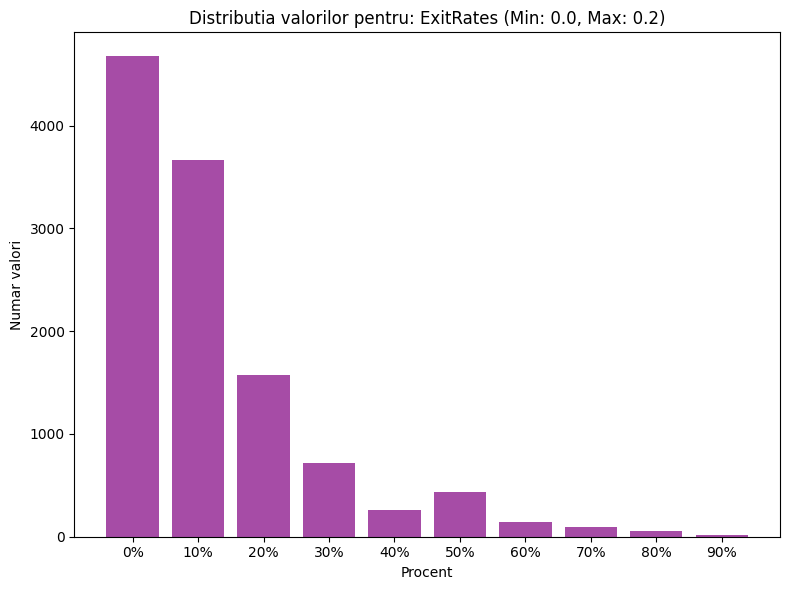

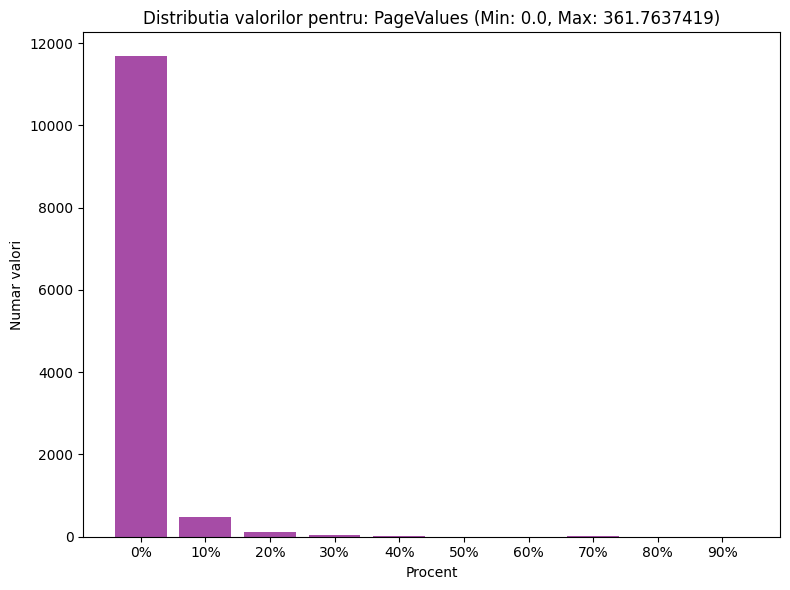

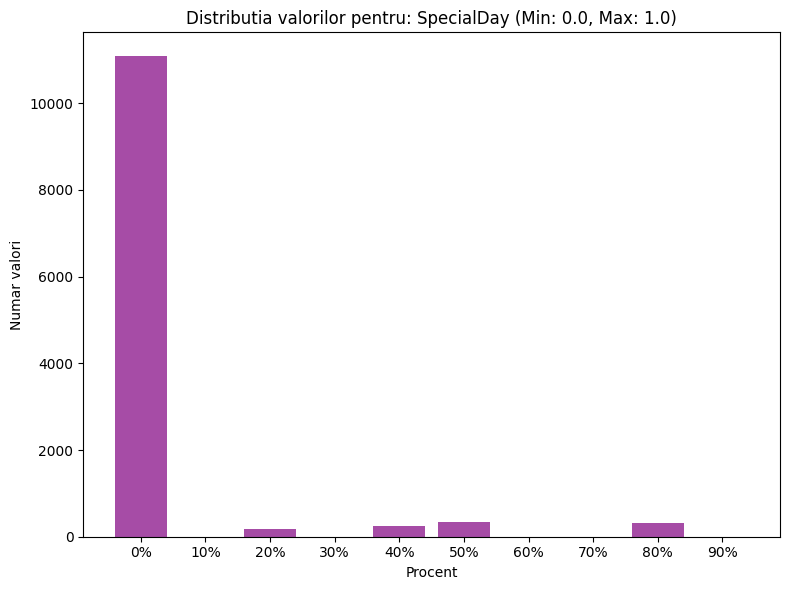

In [5]:
# 2 Atribute numerice
for attribute in numeric_columns:
    min_value = df[attribute].min()
    max_value = df[attribute].max()

    # Granularitate de 10%
    percentiles = np.linspace(min_value, max_value, 11)


    counts = [((df[attribute] >= percentiles[i]) & (df[attribute] < percentiles[i + 1])).sum()
              for i in range(len(percentiles) - 1)]

    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(0, 10), counts, width=0.8, alpha=0.7, color='purple', align='center')
    plt.xlabel('Procent')
    plt.ylabel('Numar valori')
    plt.title(f'Distributia valorilor pentru: {attribute} (Min: {min_value}, Max: {max_value})')

    plt.xticks(np.arange(0, 10), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])
    plt.tight_layout()
    plt.show()

## A.
### ii) Atribute Categorice

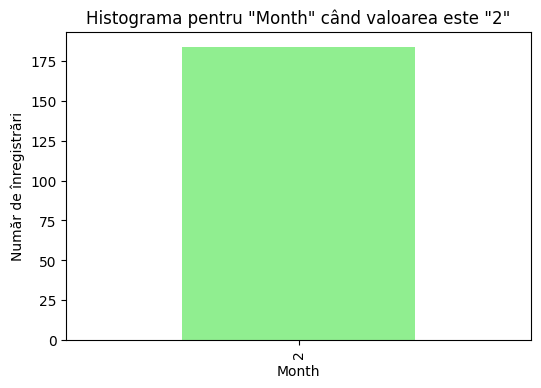

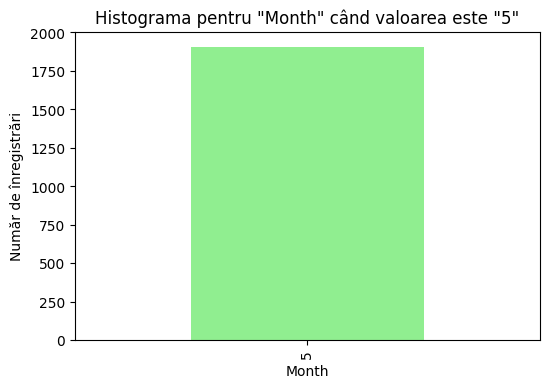

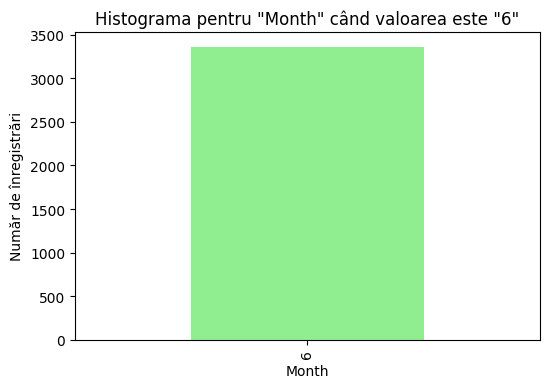

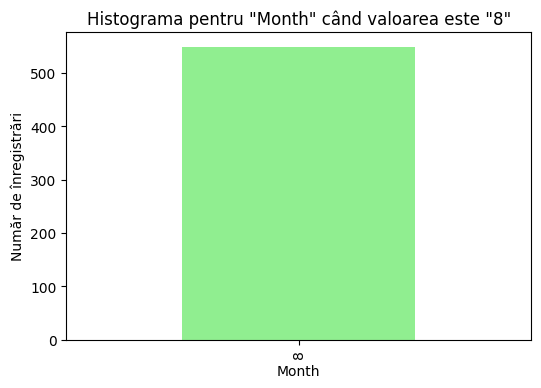

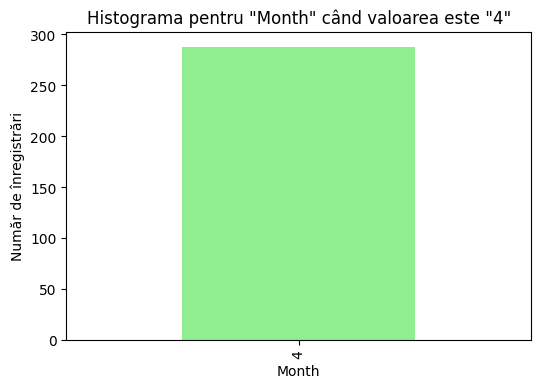

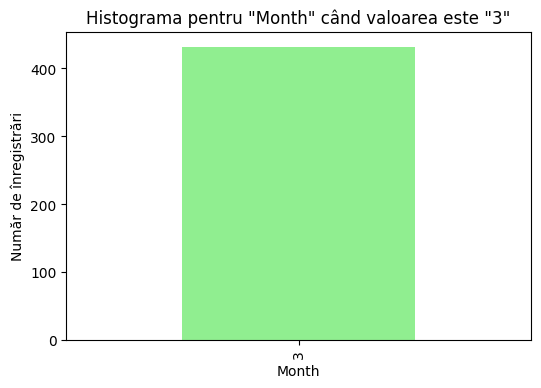

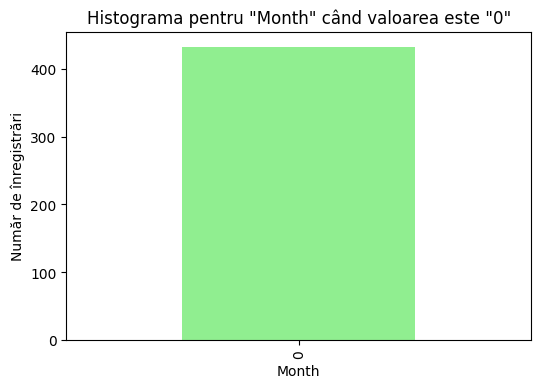

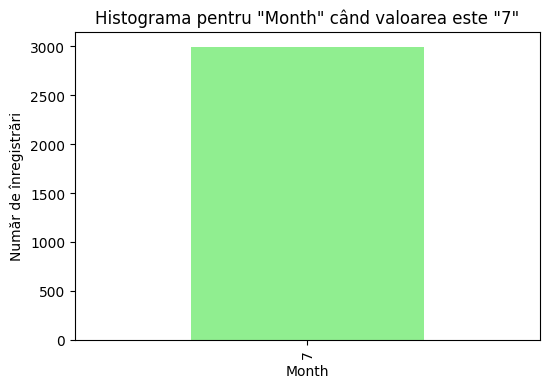

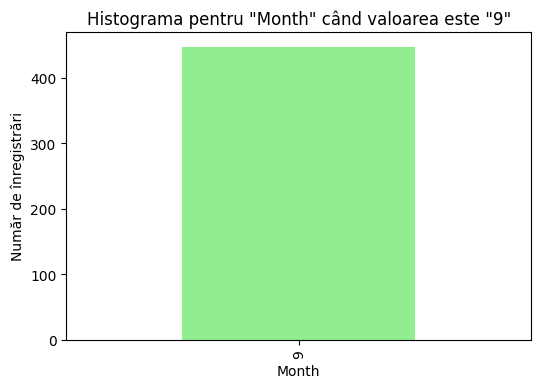

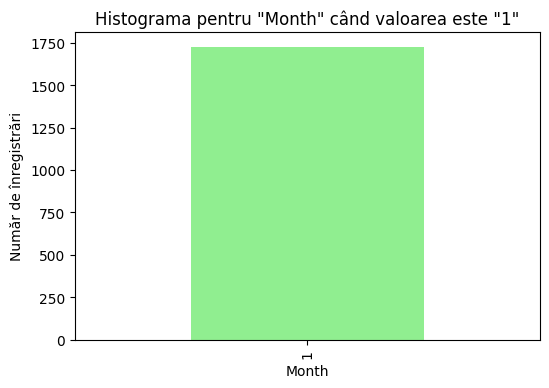

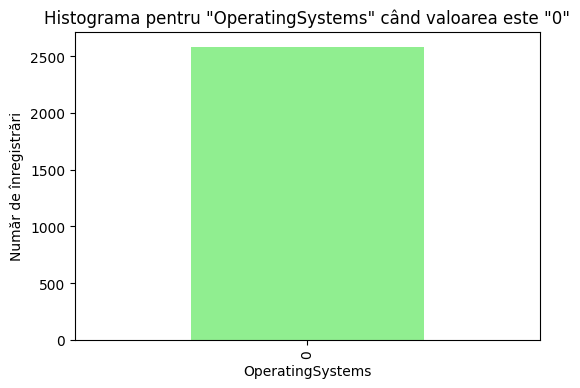

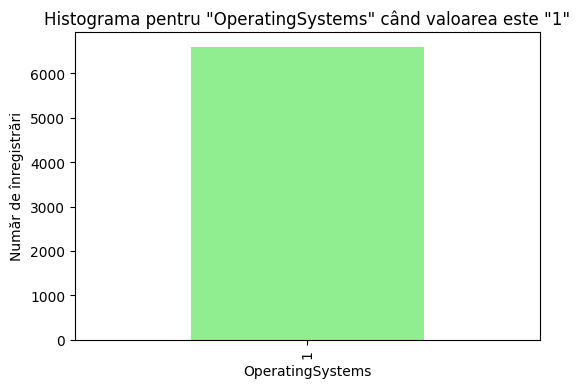

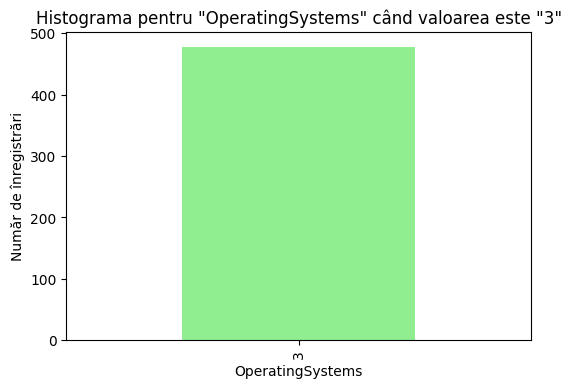

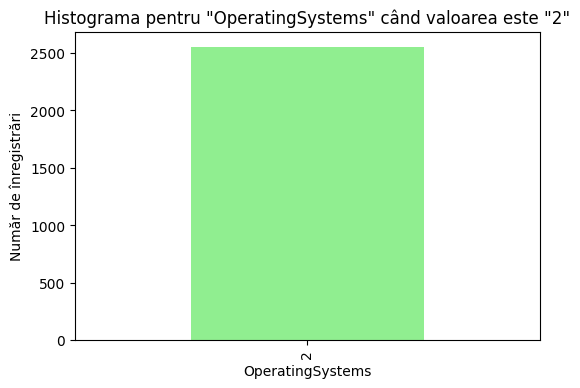

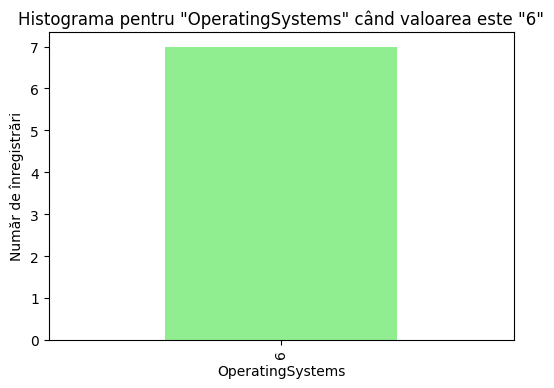

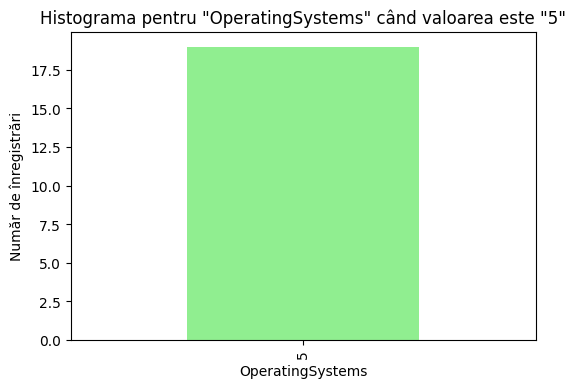

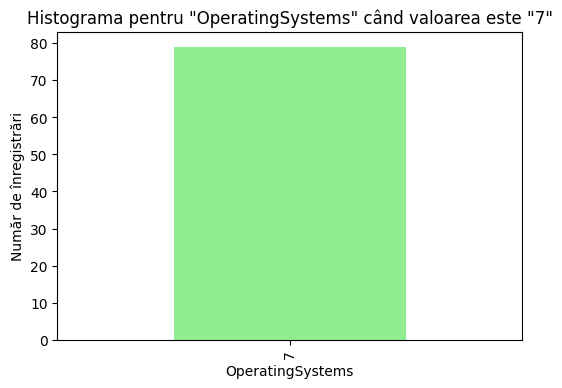

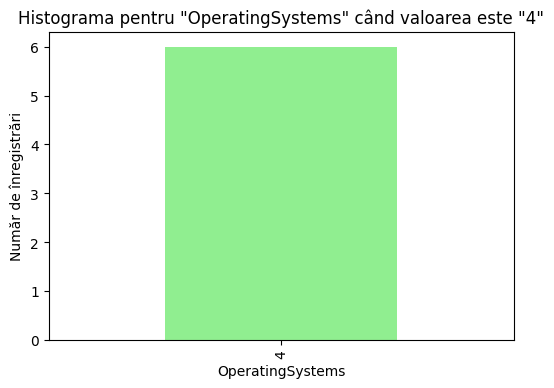

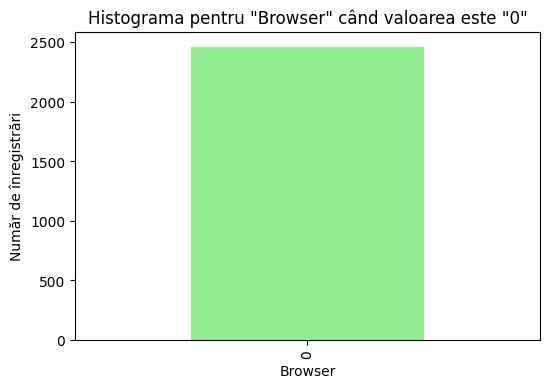

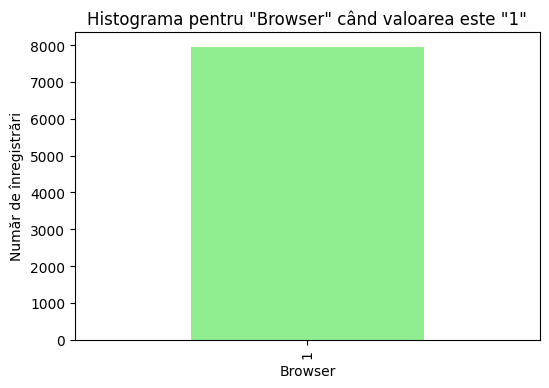

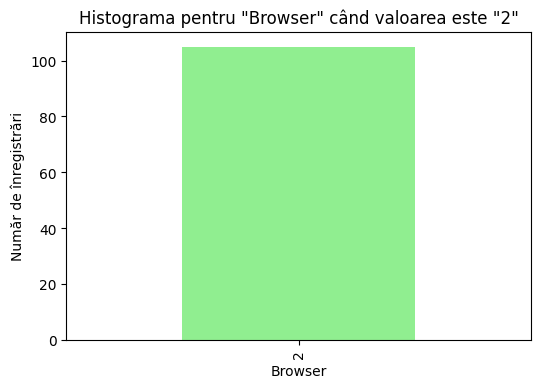

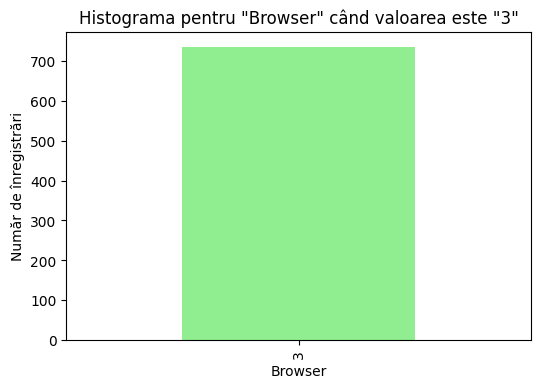

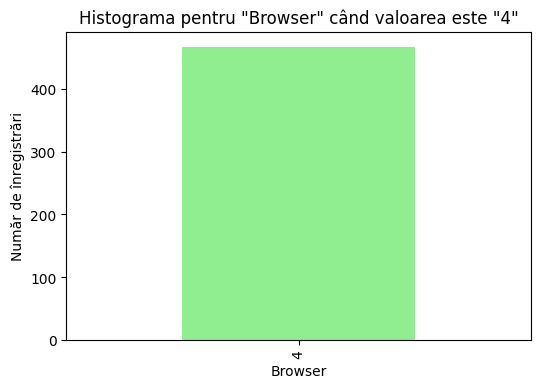

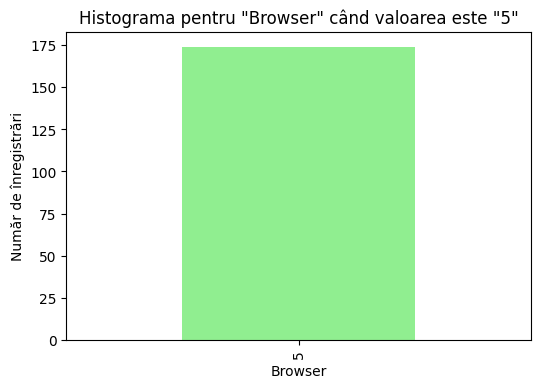

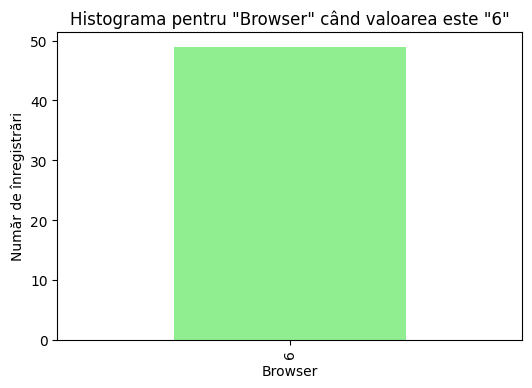

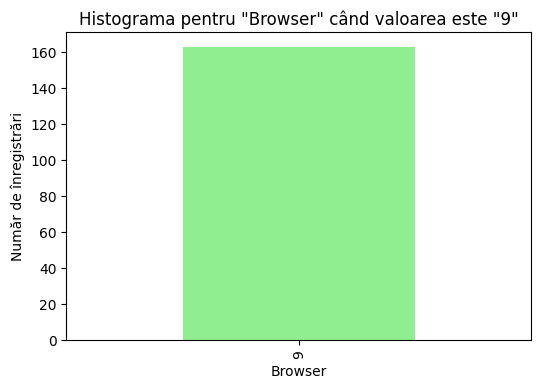

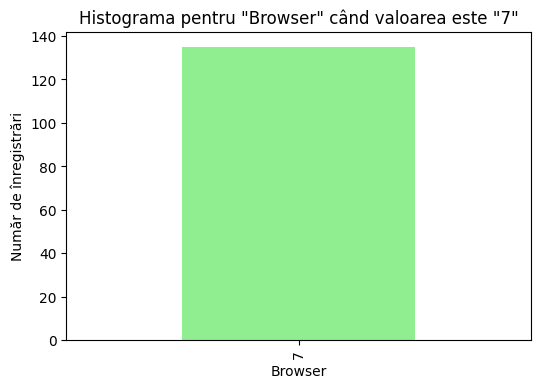

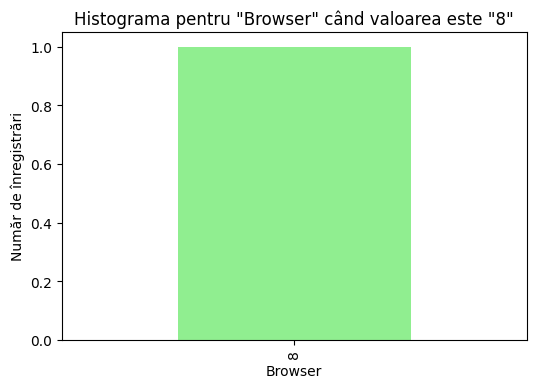

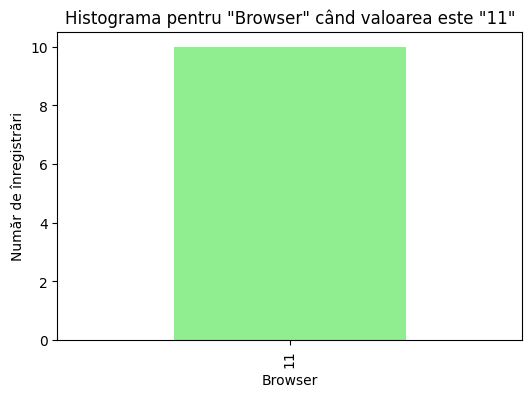

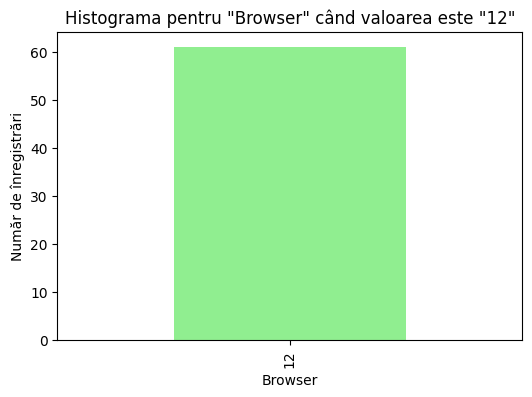

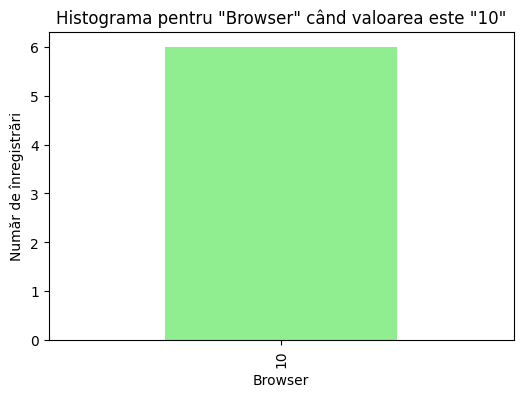

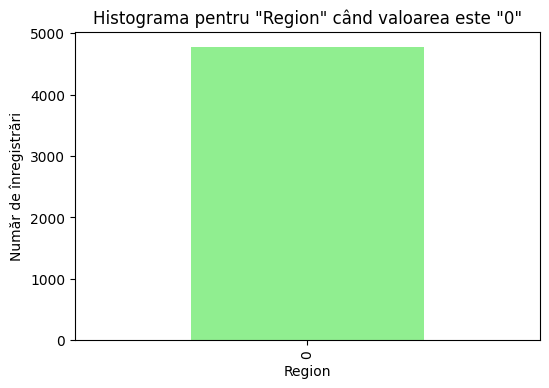

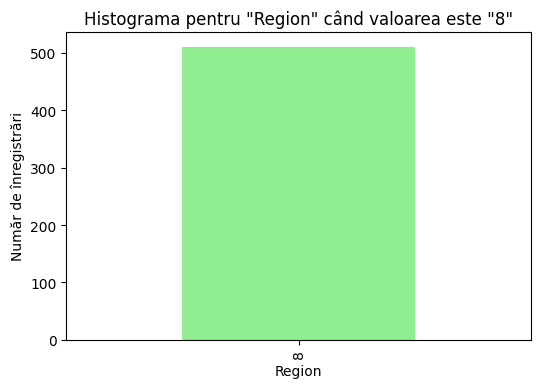

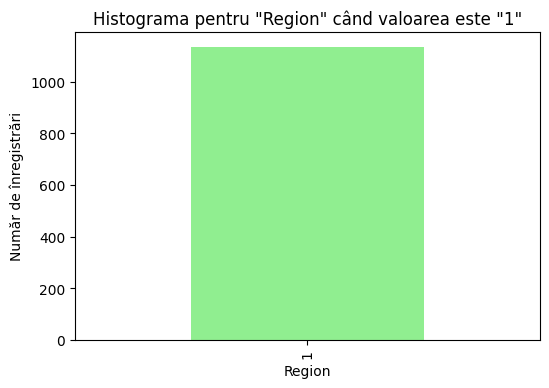

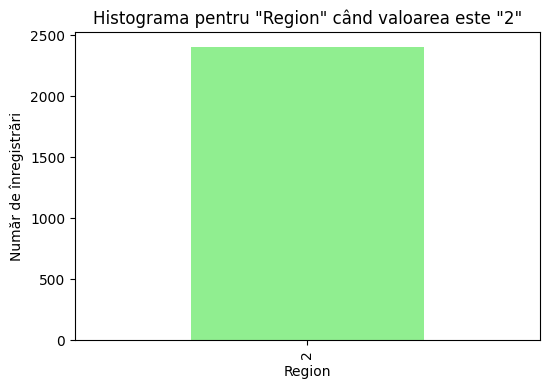

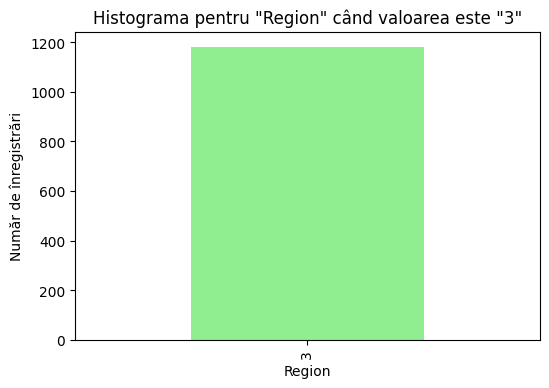

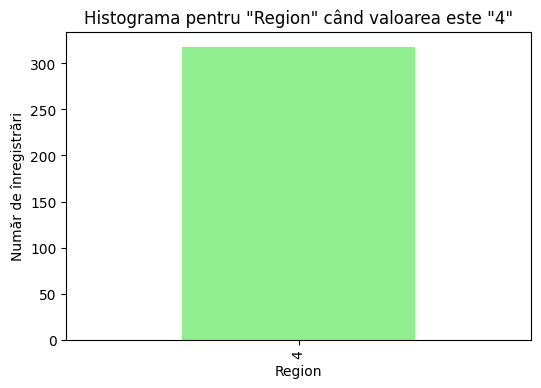

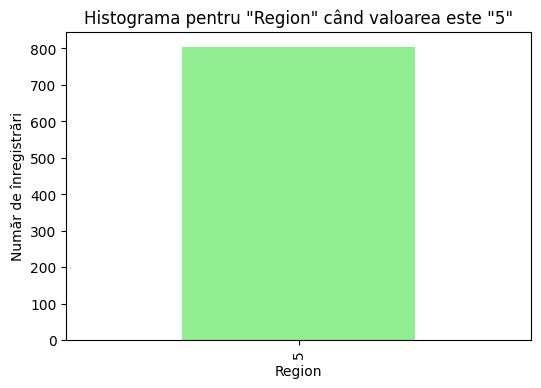

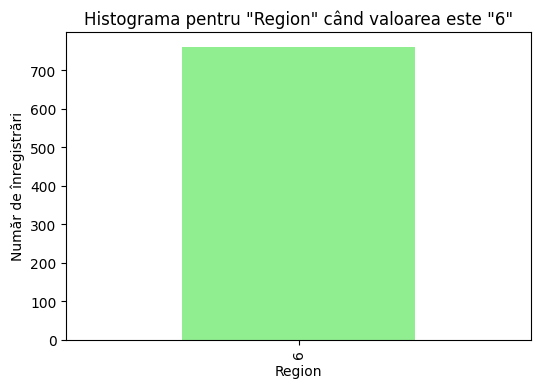

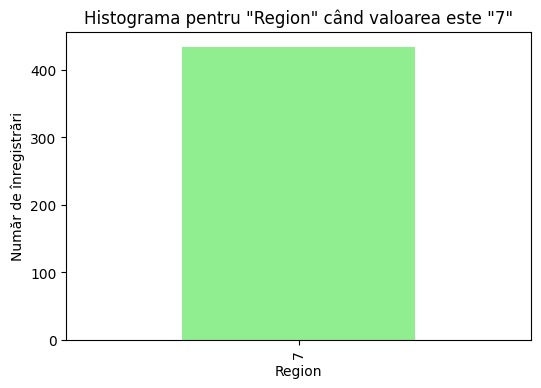

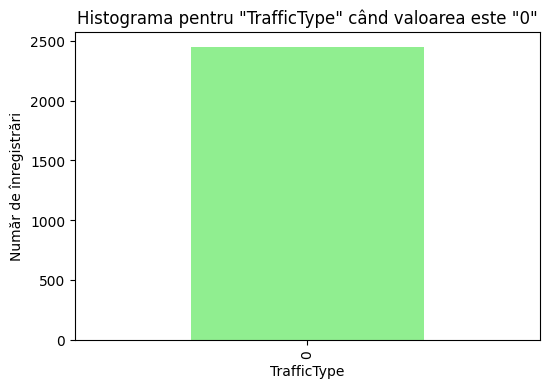

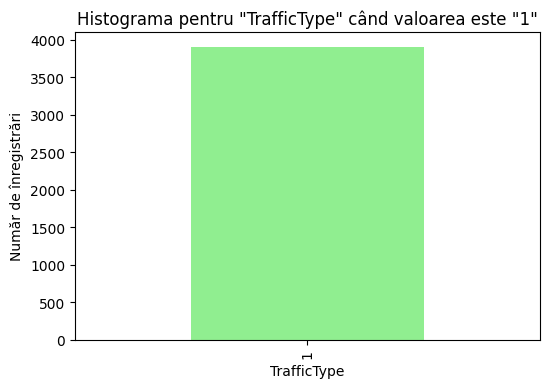

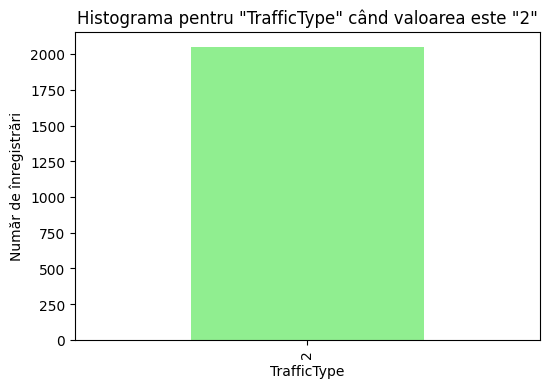

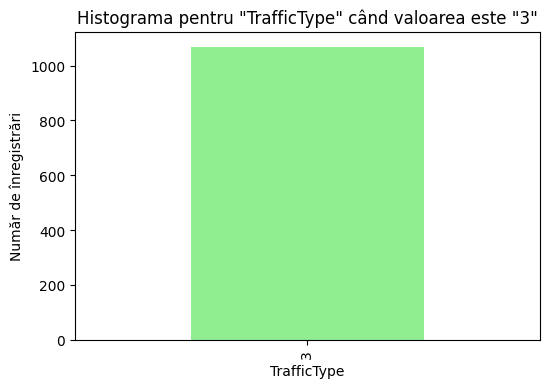

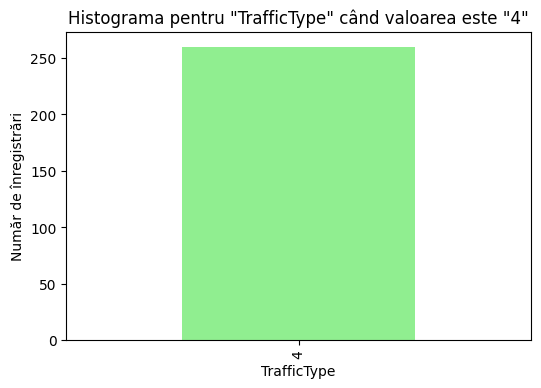

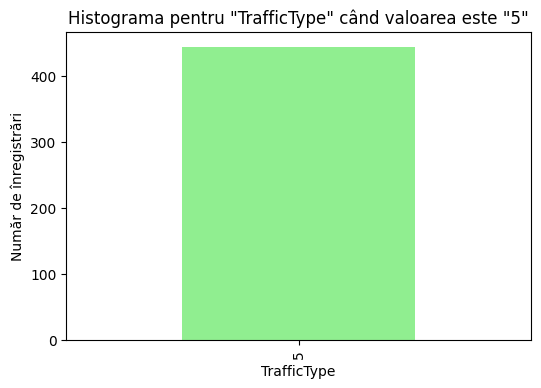

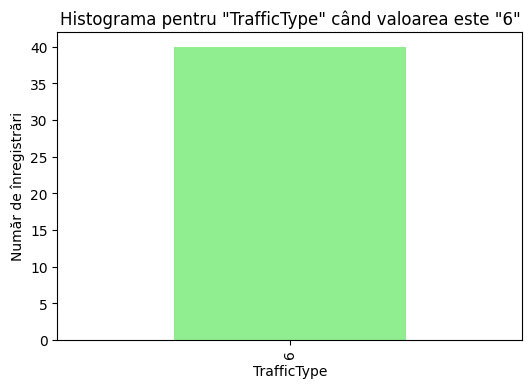

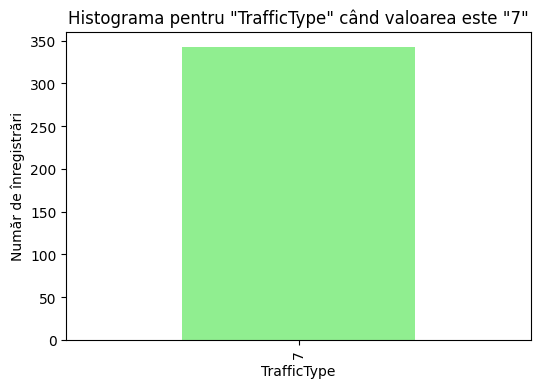

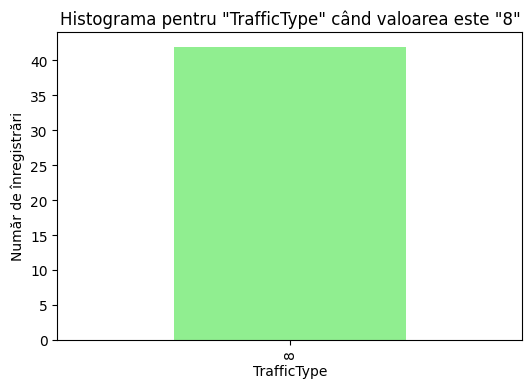

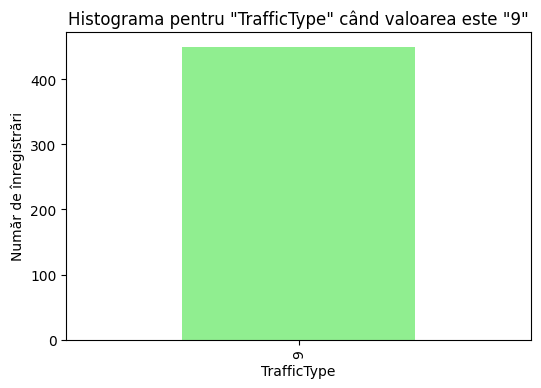

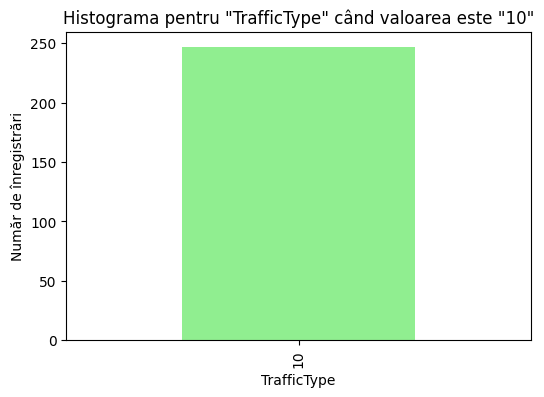

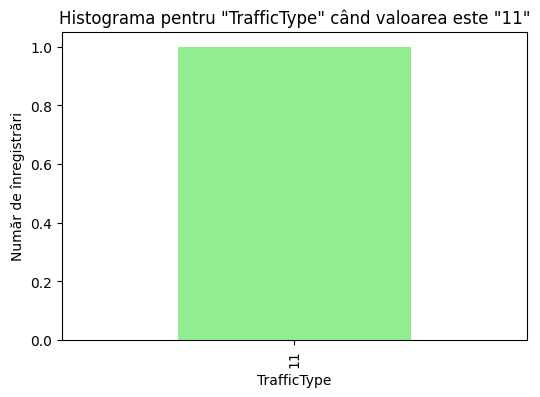

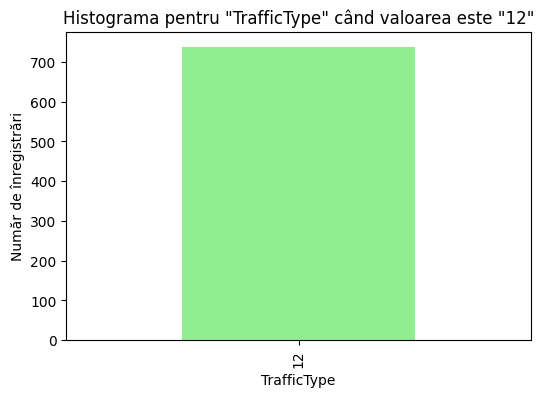

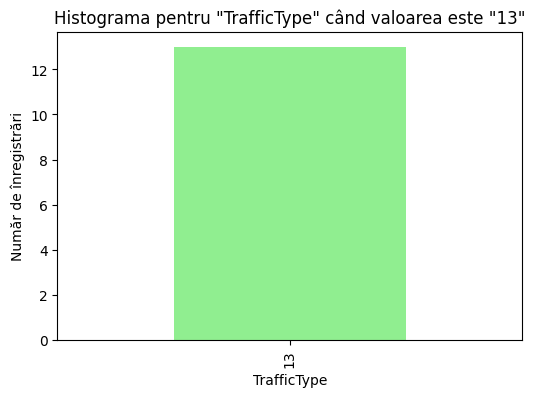

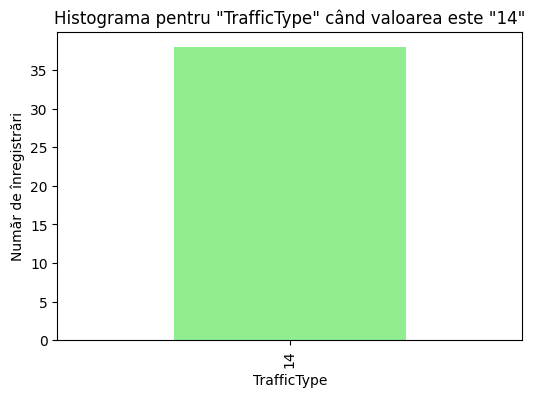

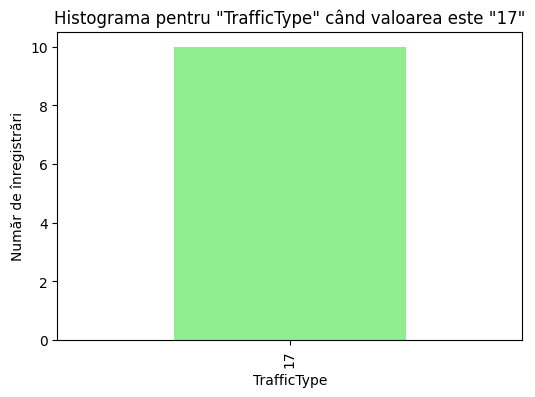

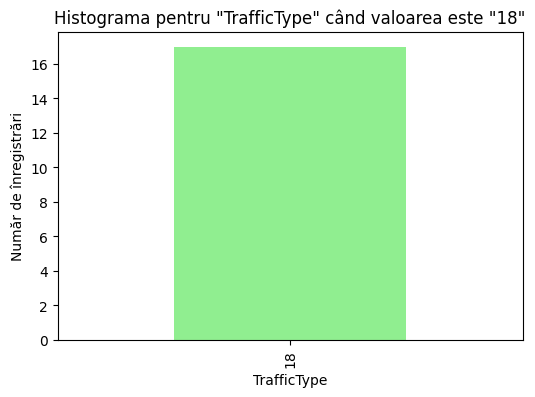

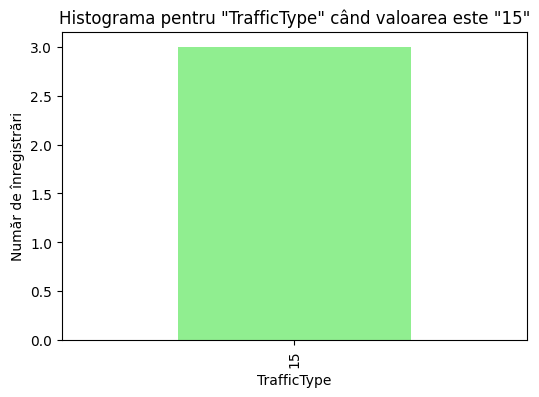

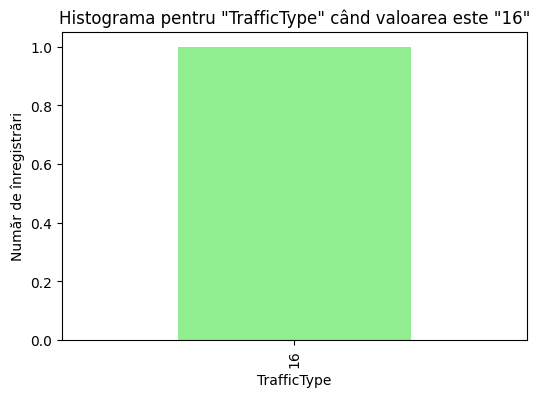

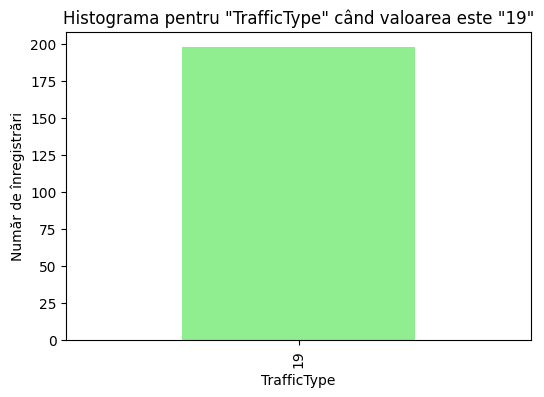

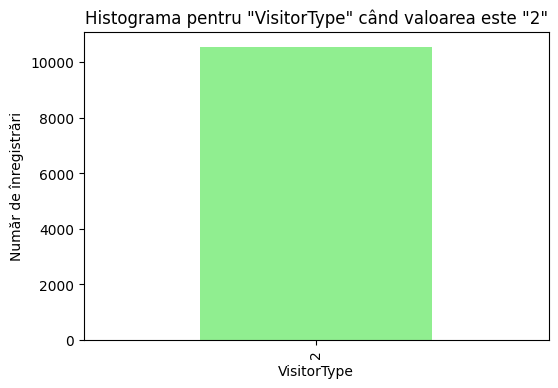

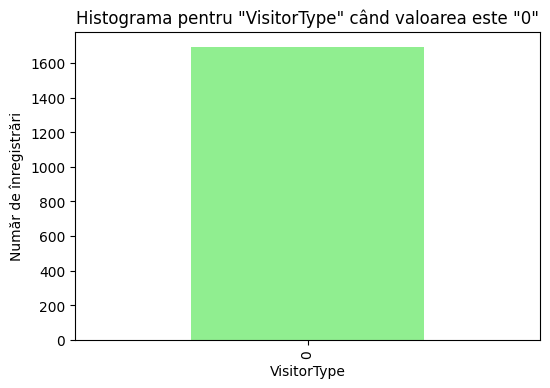

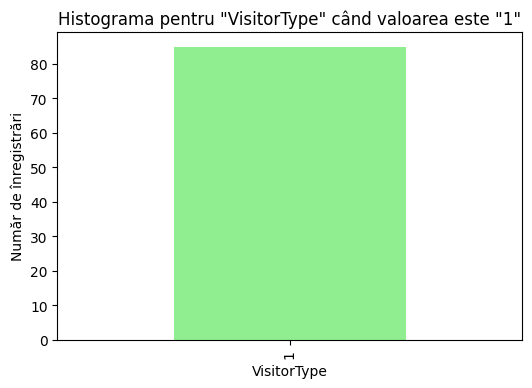

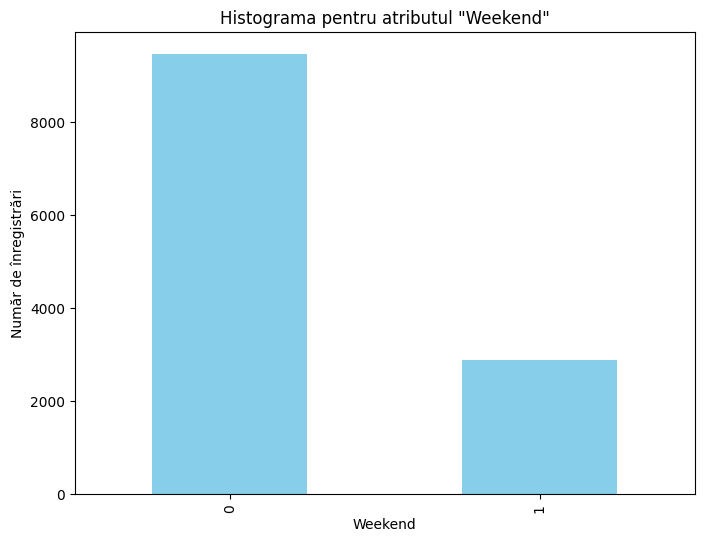

In [6]:
#2 Atribute Categorice

# Realizarea graficelor pentru histograma fiecărei valori posibile a atributelor categorice
for attribute in categorical_columns:
    if attribute == 'Weekend' or attribute == 'Revenue':
        # Pentru atributele de tip bool, folosim value_counts() și bar plot
        plt.figure(figsize=(8, 6))
        df[attribute].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Histograma pentru atributul "{attribute}"')
        plt.xlabel(attribute)
        plt.ylabel('Număr de înregistrări')
        plt.show()
    else:
        # Pentru celelalte atribute, creăm un grafic separat pentru fiecare valoare posibilă
        unique_values = df[attribute].unique()
        for value in unique_values:
            plt.figure(figsize=(6, 4))
            df[df[attribute] == value][attribute].value_counts().plot(kind='bar', color='lightgreen')
            plt.title(f'Histograma pentru "{attribute}" când valoarea este "{value}"')
            plt.xlabel(attribute)
            plt.ylabel('Număr de înregistrări')
            plt.show()

# B. Grad de corelare
## i) Atribute numerice

                         Coefficient        p-value
Administrative              0.138917   3.519760e-54
Administrative_Duration     0.093587   2.146514e-25
Informational               0.095200   3.174034e-26
Informational_Duration      0.070345   5.282871e-15
ProductRelated              0.158538   3.241187e-70
ProductRelated_Duration     0.152373   6.115338e-65
BounceRates                -0.150673   1.594198e-63
ExitRates                  -0.207071  1.662654e-119
PageValues                  0.492569   0.000000e+00
SpecialDay                 -0.082305   5.498934e-20


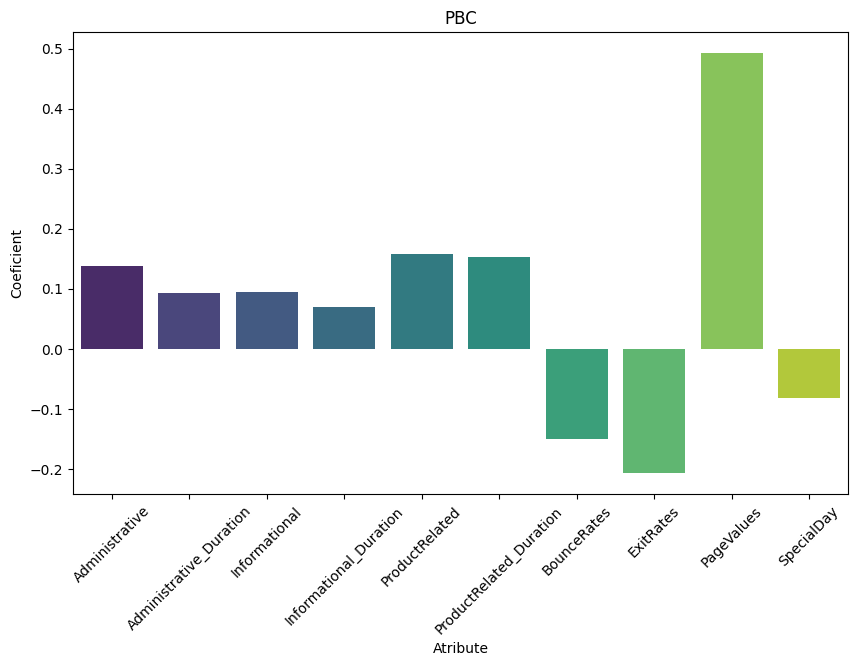

In [7]:
from scipy.stats import pointbiserialr
#B Atribute numerice
correlation_results_numeric = {}
for column in numeric_columns:
    correlation_coeff, p_value = pointbiserialr(df['Revenue'], df[column])
    correlation_results_numeric[column] = {'Coefficient': correlation_coeff, 'p-value': p_value}


correlation_df_numeric = pd.DataFrame(correlation_results_numeric).T
print(correlation_df_numeric)
significant_numeric = correlation_df_numeric[correlation_df_numeric['p-value'] <= 0.05]


if not significant_numeric.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=significant_numeric.index, y='Coefficient', data=significant_numeric, palette='viridis')
    plt.title('PBC')
    plt.xlabel('Atribute')
    plt.ylabel('Coeficient')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Nu există atribute numerice semnificative în corelație cu variabila țintă.")

## ii) Atribute categorice

                  Chi-squared       p-value
Month              384.934762  2.238786e-77
OperatingSystems    75.027056  1.416094e-13
Browser             27.715299  6.087543e-03
Region               9.252751  3.214250e-01
TrafficType        373.145565  1.652735e-67
VisitorType        135.251923  4.269904e-30
Weekend             10.390978  1.266325e-03


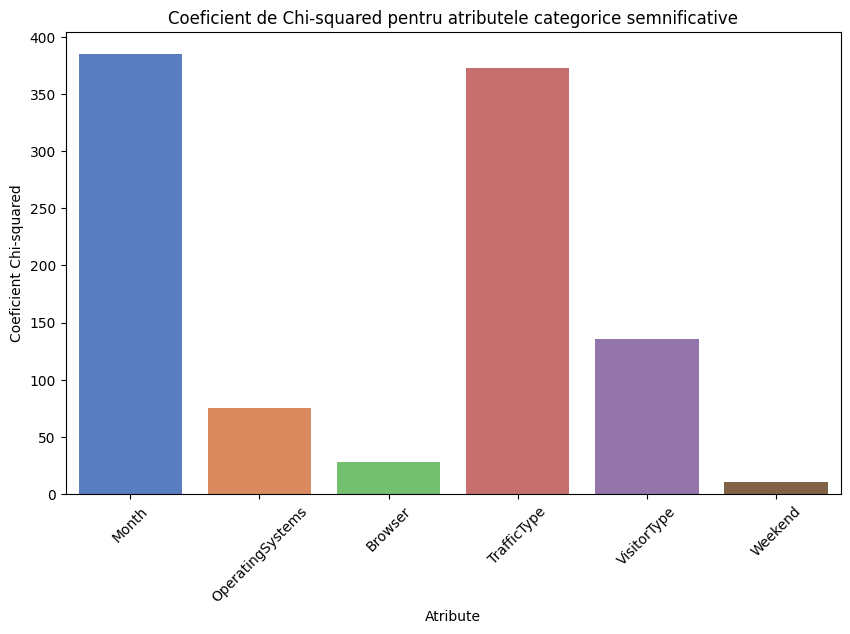

In [8]:
#3 Atribute Categorice
from scipy.stats import chi2_contingency

# Calcularea testului Chi-squared pentru fiecare atribut categoric
correlation_results_categorical = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Revenue'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    correlation_results_categorical[column] = {'Chi-squared': chi2, 'p-value': p_value}

# Afisarea rezultatelor
correlation_df_categorical = pd.DataFrame(correlation_results_categorical).T
print(correlation_df_categorical)
significant_categorical = correlation_df_categorical[correlation_df_categorical['p-value'] <= 0.05]

# Afișarea coeficientului Chi-squared pentru atributele semnificative
if not significant_categorical.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=significant_categorical.index, y='Chi-squared', data=significant_categorical, palette='muted')
    plt.title('Coeficient de Chi-squared pentru atributele categorice semnificative')
    plt.xlabel('Atribute')
    plt.ylabel('Coeficient Chi-squared')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Nu există atribute categorice semnificative în corelație cu variabila țintă.")

# 3. Antrenarea și Evaluarea Algoritmilor de Predicție

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scalează datele folosind diferite metode
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
results = {}

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Antrenare model de regresie logistică
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[type(scaler).__name__] = accuracy

# Afișare rezultate
results_df = pd.DataFrame(results.items(), columns=['Scaler', 'Accuracy'])
print(results_df)



           Scaler  Accuracy
0    MinMaxScaler  0.863747
1  StandardScaler  0.869019
2    RobustScaler  0.869019


# A. Regresie Logistica
## 1. Implementare Manuala

In [10]:
#Regresie logistica

import math
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def logistic(x):
    x = np.clip(x, -500, 500)
    return 1/(1 + np.exp(-x))

def nll(Y, T):
    epsilon = 1e-15  # A small value to prevent log(0) issues
    result = np.sum(t * np.log(y + epsilon) + (1 - t) * np.log(1 - (y + epsilon)) for y, t in zip(Y, T))
    return -result

def accuracy(Y, T):
    correct = 0
    total = len(T)

    for y, t in zip(Y, T):
        if round(y) == t:
            correct += 1

    return correct / total

def train_logistic(X, T, lr=.01, epochs_no=100):
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn((D+1))

    for epochs in range(epochs_no):
      Z = np.dot(X_hat, W)
      Y = logistic(Z)

      error = Y - T
      gradient = np.dot(X_hat.T, error) / N

      W -= lr * gradient

    return W

def predict_logistic(X, W):
    N = X.shape[0]
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    Z = np.dot(X_hat, W)
    Y = logistic(Z)
    predictions = np.round(Y)
    return predictions

dataset = pd.read_csv('dataset.csv')

# Convertiți variabilele categorice în formă numerică
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Definiți variabila țintă și atributele
X = dataset.drop('Revenue', axis=1).values
y = dataset['Revenue'].values

# Configurați numărul de împărțiri și listele pentru stocarea rezultatelor
num_splits = 10
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
results = {'Scaler': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Accuracy': []}

# Realizați 10 împărțiri aleatoare și antrenați modelele
for i in range(num_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Antrenare model de regresie logistică cu funcțiile personalizate
        W = train_logistic(X_train_scaled, y_train, lr=.1, epochs_no=1000)

        # Evaluate model
        y_pred = predict_logistic(X_test_scaled, W)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Salvare rezultate în lista de rezultate
        results['Scaler'].append(type(scaler).__name__)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['Accuracy'].append(accuracy)

# Calculați media și varianța pentru fiecare configurație a algoritmilor
results_df = pd.DataFrame(results)
grouped_results1 = results_df.groupby('Scaler').agg({'Precision': [np.mean, np.var],
                                                    'Recall': [np.mean, np.var],
                                                    'F1-score': [np.mean, np.var],
                                                    'Accuracy': [np.mean, np.var]}).round(3)

print(grouped_results1)

best_f1_index = results_df['F1-score'].idxmax()
best_f1_configuration = results_df.loc[best_f1_index, 'Scaler']

print(f"\nConfigurația cu cea mai bună metrică F1: {best_f1_configuration}")

               Precision        Recall        F1-score       Accuracy       
                    mean    var   mean    var     mean   var     mean    var
Scaler                                                                      
MinMaxScaler       0.485  0.137  0.007  0.000    0.013  0.00    0.845  0.000
RobustScaler       0.737  0.017  0.373  0.029    0.457  0.01    0.870  0.001
StandardScaler     0.757  0.001  0.380  0.000    0.505  0.00    0.885  0.000

Configurația cu cea mai bună metrică F1: RobustScaler


## 2. Implementare folosind biblioteca scikit-learn

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Citirea setului de date
dataset = pd.read_csv('dataset.csv')

# Convertiți variabilele categorice în formă numerică
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Definirea variabilei țintă și a atributelor
X = dataset.drop('Revenue', axis=1).values
y = dataset['Revenue'].values

# Inițializați listele pentru stocarea rezultatelor
results = {'Scaler': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Accuracy': []}

# Realizați 10 împărțiri aleatoare și antrenați modelele
for i in range(10):
    # Împărțirea datelor
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    for scaler in [MinMaxScaler(), StandardScaler(), RobustScaler()]:
        # Scalare date
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Antrenare model de regresie logistică
        model = LogisticRegression(random_state=42, max_iter=1000)
        model.fit(X_train_scaled, y_train)

        # Evaluare model
        y_pred = model.predict(X_test_scaled)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Salvare rezultate în lista de rezultate
        results['Scaler'].append(type(scaler).__name__)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['Accuracy'].append(accuracy)

# Calculați media și varianța pentru fiecare configurație a algoritmilor
results_df = pd.DataFrame(results)
grouped_results2 = results_df.groupby('Scaler').agg({'Precision': [np.mean, np.var],
                                                    'Recall': [np.mean, np.var],
                                                    'F1-score': [np.mean, np.var],
                                                    'Accuracy': [np.mean, np.var]}).round(3)

# Găsiți configurația cu cea mai bună metrică F1
best_f1_index = results_df['F1-score'].idxmax()
best_f1_configuration = results_df.loc[best_f1_index, 'Scaler']

print(grouped_results2)
print(f"\nConfigurația cu cea mai bună metrică F1: {best_f1_configuration}")

               Precision        Recall        F1-score        Accuracy     
                    mean    var   mean    var     mean    var     mean  var
Scaler                                                                     
MinMaxScaler       0.775  0.001  0.281  0.001    0.412  0.001    0.875  0.0
RobustScaler       0.759  0.001  0.386  0.000    0.511  0.000    0.885  0.0
StandardScaler     0.759  0.001  0.385  0.000    0.511  0.000    0.885  0.0

Configurația cu cea mai bună metrică F1: RobustScaler


# B. Arbori de decizie
## 1. Modelul scikit-learn.

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Inițializați listele pentru stocarea rezultatelor
results = {'Scaler': [], 'Depth': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'Accuracy': []}

# Realizați 10 împărțiri aleatoare și antrenați modelele
for i in range(10):
    # Împărțirea datelor


    for scaler in [MinMaxScaler(), StandardScaler(), RobustScaler(), None]:
        if scaler is not None:
            # Scalare date (în cazul în care se dorește)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            # Fără scalare
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
            X_train_scaled = X_train
            X_test_scaled = X_test

        for depth in range(3, 7):
            # Antrenare model de arbore de decizie cu adâncimea specificată
            model = DecisionTreeClassifier(max_depth=depth, random_state=42)
            model.fit(X_train_scaled, y_train)

            # Evaluare model
            y_pred = model.predict(X_test_scaled)
            precision = precision_score(y_test, y_pred, zero_division=1)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            # Salvare rezultate în lista de rezultate
            results['Scaler'].append('None' if scaler is None else type(scaler).__name__)
            results['Depth'].append(depth)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['F1-score'].append(f1)
            results['Accuracy'].append(accuracy)

# Calculați media și varianța pentru fiecare configurație a algoritmilor
results_df = pd.DataFrame(results)
grouped_results3 = results_df.groupby(['Scaler', 'Depth']).agg({'Precision': [np.mean, np.var],
                                                               'Recall': [np.mean, np.var],
                                                               'F1-score': [np.mean, np.var],
                                                                'Accuracy': [np.mean, np.var]}).round(3)

# Găsiți configurația cu cea mai bună metrică F1
best_f1_index = results_df['F1-score'].idxmax()
best_f1_configuration = results_df.loc[best_f1_index, 'Scaler']

print(grouped_results3)
print(f"\nConfigurația cu cea mai bună metrică F1: {best_f1_configuration}")


                     Precision        Recall        F1-score        Accuracy  \
                          mean    var   mean    var     mean    var     mean   
Scaler         Depth                                                           
MinMaxScaler   3         0.665  0.001  0.612  0.005    0.636  0.002    0.894   
               4         0.703  0.002  0.586  0.005    0.635  0.002    0.898   
               5         0.716  0.002  0.579  0.002    0.638  0.001    0.900   
               6         0.690  0.002  0.582  0.002    0.630  0.001    0.896   
None           3         0.658  0.001  0.630  0.001    0.644  0.001    0.894   
               4         0.703  0.001  0.568  0.004    0.625  0.001    0.897   
               5         0.696  0.003  0.575  0.002    0.627  0.000    0.896   
               6         0.698  0.002  0.572  0.001    0.627  0.001    0.897   
RobustScaler   3         0.652  0.000  0.646  0.000    0.649  0.000    0.893   
               4         0.698  0.000  0